# A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams
This is the code for the paper entitled "**A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams**" accepted in IEEE Internet of Things Magazine.  
Authors: Li Yang (lyang339@uwo.ca) and Abdallah Shami (Abdallah.Shami@uwo.ca)  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

**Notebook 1: Data pre-processing**  
Aims:  
&nbsp; 1): Assign columns names and transform the original 'txt' files to dataframes  
&nbsp; 2): Transform the multi-class dataset to the binary dataset for anomaly detection  
&nbsp; 3): Label encoding to pre-process string features  

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
import os

## Read the NSL-KDD dataset
The NSL-KDD dataset is publicly available at: [[1]](https://www.unb.ca/cic/datasets/nsl.html) [[2]](https://github.com/jmnwong/NSL-KDD-Dataset)

In [2]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
#Assign column names
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [4]:
# Change the working directory
os.chdir('/content/drive/MyDrive/drift-detection/')

#Read the original training and test sets
df1 = pd.read_csv('KDDTrain+.txt', header=None, names=col_names)
df2 = pd.read_csv('KDDTest+.txt', header=None, names=col_names)


In [5]:
# Print the shape of both datasets
print("Shape of the training set:", df1.shape)
print("Shape of the test set:", df2.shape)

Shape of the training set: (125973, 43)
Shape of the test set: (22544, 43)


Shape of the training set: (125973, 43)
Shape of the test set: (22544, 43)


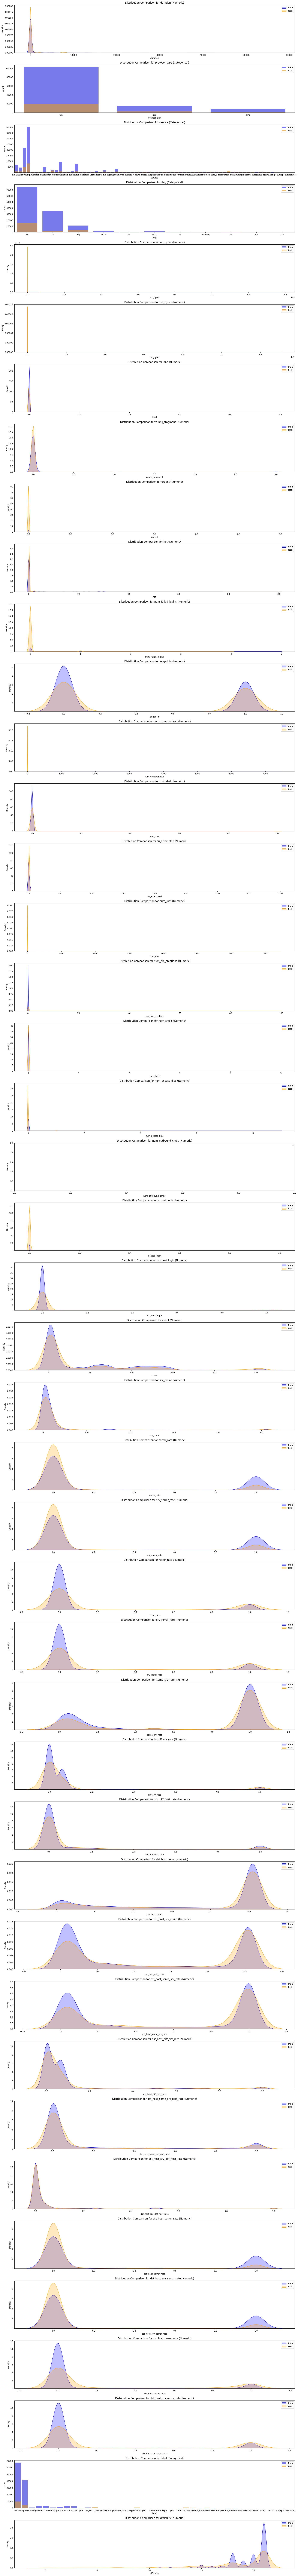

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print the shapes of both datasets
print("Shape of the training set:", df1.shape)
print("Shape of the test set:", df2.shape)

# List of columns in the dataset
columns = df1.columns

# Number of columns
n_cols = len(columns)

# Plot settings
plt.figure(figsize=(20, n_cols * 4))

# Loop through each column to compare distributions
for i, col in enumerate(columns):
    plt.subplot(n_cols, 1, i + 1)

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df1[col]):
        sns.kdeplot(df1[col], label='Train', color='blue', fill=True)
        sns.kdeplot(df2[col], label='Test', color='orange', fill=True)
        plt.title(f'Distribution Comparison for {col} (Numeric)')
    else:
        # Use count plot for categorical variables
        sns.countplot(x=col, data=df1, label='Train', color='blue', alpha=0.6)
        sns.countplot(x=col, data=df2, label='Test', color='orange', alpha=0.6)
        plt.title(f'Distribution Comparison for {col} (Categorical)')

    plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# Export the dataset to a CSV file
df2.to_csv('NSL_KDD_test_dataset_original.csv', index=False)

In [19]:
#display the dataset
df2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


## Transform the NSL-KDD dataset to binary dataset (normal & attack)

In [20]:
#"normal" label is set to 0, all attack labels are set to 1

df1.drop(['difficulty'], axis=1, inplace=True)
df2.drop(['difficulty'], axis=1, inplace=True)

df1['label'][df1['label']=='normal']=0
df1['label'][df1['label']!=0]=1
df2['label'][df2['label']=='normal']=0
df2['label'][df2['label']!=0]=1

## Label encoding to transform string features to numerical features

In [21]:
#Using Label encoder to transform string features to numerical features
from sklearn.preprocessing import LabelEncoder
def Encoding (df):
    cat_features=[x for x in df.columns if df[x].dtype=="object"]
    le=LabelEncoder()
    for col in cat_features:
        if col in df.columns:
            i = df.columns.get_loc(col)
            df.iloc[:,i] = le.fit_transform(df.iloc[:,i].astype(str))
    return df

In [22]:
df1 = Encoding(df1)
df2 = Encoding(df2)

## Save the pre-processed dataset
df1: training set  
df2: test set  
df: training & test set  

In [23]:
df = pd.concat([df1, df2], ignore_index=True)

In [24]:
df1.to_csv('NSL_KDD_binary_train.csv',index=0)
df2.to_csv('NSL_KDD_binary_test.csv',index=0)

In [25]:
df.to_csv('NSL_KDD_binary(train+test).csv',index=0)